# **Classification of Income & Analysis**

## Introduction

The income dataset was extracted from UCI.

### Objective
The goal of this project is to clean the data, analysis, predict (whether a person makes over 50K a year or not given their demographic variation). To achieve this, several classification techniques are explored and the random forest model yields to the best prediction result.

* Source: 
 -  [adult data set](https://archive.ics.uci.edu/ml/datasets/adult/)



## Fetching Data 

### Import Package and Data

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [171]:
income_df = pd.read_csv("adult.csv")
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [172]:
income_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning

 ### Dealing with Missing Value

In [173]:
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Attributes workclass, occupation, and native-country most NAs. Let's drop these NA. 

In [174]:
income_df.age = income_df.age.astype(float)
income_df['hours-per-week'] = income_df['hours-per-week'].astype(float)

In [175]:
my_df = income_df.dropna()

In [176]:
#my_df['income'] = my_df['income']
#del my_df['income']
my_df['education-num'] = my_df['educational-num']
del my_df['educational-num']


In [232]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   marital-status  48842 non-null  object 
 5   occupation      48842 non-null  object 
 6   relationship    48842 non-null  object 
 7   race            48842 non-null  object 
 8   gender          48842 non-null  object 
 9   capital-gain    48842 non-null  int64  
 10  capital-loss    48842 non-null  int64  
 11  hours-per-week  48842 non-null  float64
 12  native-country  48842 non-null  object 
 13  income          48842 non-null  object 
 14  education-num   48842 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ MB


In [178]:
my_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
education-num     0
dtype: int64

In [235]:
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [179]:
income_df['fnlwgt'].sum()

9263575662

In [224]:
income_df.tail

<bound method NDFrame.tail of         age     workclass  fnlwgt     education  educational-num  \
0      25.0       Private  226802          11th                7   
1      38.0       Private   89814       HS-grad                9   
2      28.0     Local-gov  336951    Assoc-acdm               12   
3      44.0       Private  160323  Some-college               10   
5      34.0       Private  198693          10th                6   
...     ...           ...     ...           ...              ...   
48837  27.0       Private  257302    Assoc-acdm               12   
48838  40.0       Private  154374       HS-grad                9   
48839  58.0       Private  151910       HS-grad                9   
48840  22.0       Private  201490       HS-grad                9   
48841  52.0  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male 

In [ ]:
income_df.drop(income_df[income_df['workclass'].str.isalpha()==False].index,axis=0)

In [221]:
income_df.drop(income_df[income_df['workclass'].str.contains('[A-Za-z]')==False].index,inplace=True)
#str.contains('[A-Za-z]')

In [222]:
income_df.head(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
5,34.0,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30.0,United-States,<=50K
12,26.0,Private,82091,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39.0,United-States,<=50K


In [195]:
income_df.drop(income_df[income_df['workclass']=='?'].index)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
5,34.0,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
48838,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
48839,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
48840,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K


In [219]:
income_df.drop(income_df.index[[6]],inplace=True)

In [233]:
income_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46038 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              46038 non-null  float64
 1   workclass        46038 non-null  object 
 2   fnlwgt           46038 non-null  int64  
 3   education        46038 non-null  object 
 4   educational-num  46038 non-null  int64  
 5   marital-status   46038 non-null  object 
 6   occupation       46038 non-null  object 
 7   relationship     46038 non-null  object 
 8   race             46038 non-null  object 
 9   gender           46038 non-null  object 
 10  capital-gain     46038 non-null  int64  
 11  capital-loss     46038 non-null  int64  
 12  hours-per-week   46038 non-null  float64
 13  native-country   46038 non-null  object 
 14  income           46038 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [218]:
income_df.head(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
5,34.0,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30.0,United-States,<=50K
6,29.0,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40.0,United-States,<=50K


In [234]:
income_df['fnlwgt'].sum()

8738473343

## Feature Engineering

In [113]:
print('workclass',my_df.workclass.unique())
print('education',my_df.education.unique())
print('marital-status',my_df['marital-status'].unique())
print('occupation',my_df.occupation.unique())
print('relationship',my_df.relationship.unique())
print('race',my_df.race.unique())
print('gender',my_df.gender.unique())
print('native-country',my_df['native-country'].unique())
print('income',my_df.income.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

### income

In [114]:
#my_df.loc[income_df['income'] == ' >50K', 'income'] = 1
#my_df.loc[income_df['income'] == ' <=50K', 'income'] = 0

In [115]:
#income1 = my_df[my_df['income'] == 1]
#income0 = my_df[my_df['income'] == 0]

<AxesSubplot:xlabel='count', ylabel='income'>

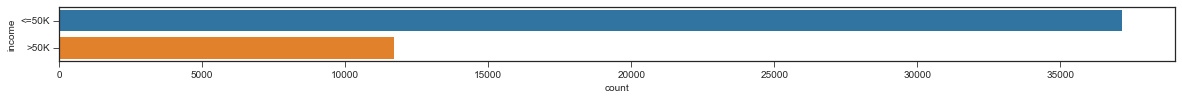

In [14]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=my_df)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

GENDER 

<AxesSubplot:xlabel='count', ylabel='gender'>

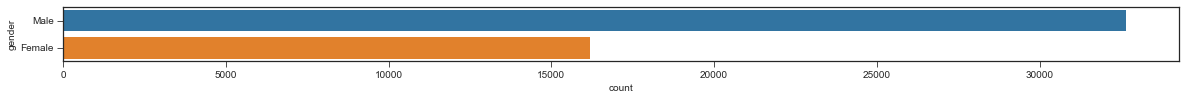

In [15]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="gender", data=my_df)

### Education

In [16]:
#income_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

In [17]:

my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [18]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.238900
0,Bachelors,13.000000
1,CommunityCollege,10.361967
3,HighGrad,9.000000
5,dropout,5.614544


<AxesSubplot:xlabel='count', ylabel='education'>

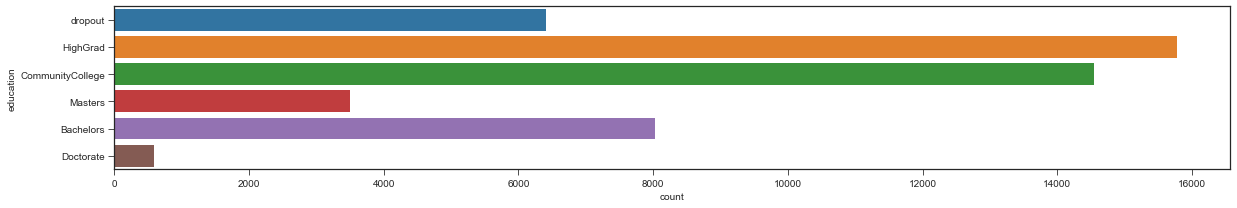

In [19]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df)

### Marital-status

In [20]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

<AxesSubplot:xlabel='count', ylabel='marital-status'>

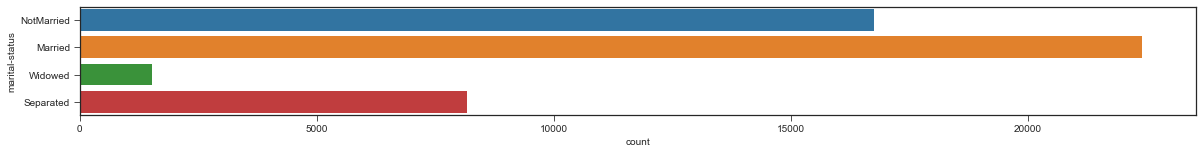

In [21]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df)

### Occupation

<AxesSubplot:xlabel='count', ylabel='occupation'>

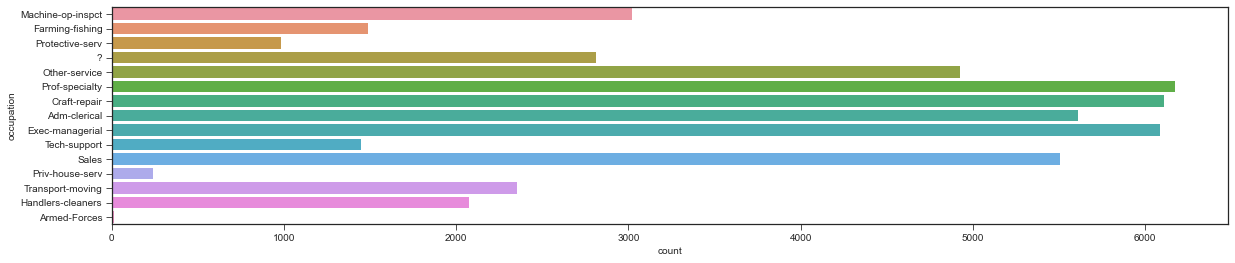

In [22]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=my_df)

### Workclass

<AxesSubplot:xlabel='count', ylabel='workclass'>

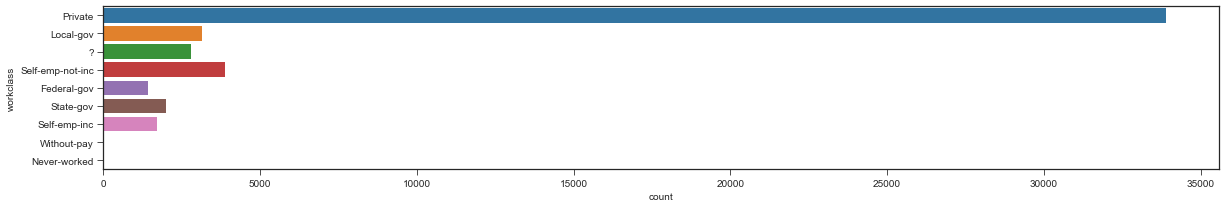

In [23]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=my_df)

In [24]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
#grid = sns.FacetGrid(my_df, col='income', row='workclass', size=2.2, aspect=1.6)
#grid.map(plt.hist, 'age', alpha=.5, bins=20)
#grid.add_legend()

### age

In [25]:
# make the age variable discretized 
my_df['age_bin'] = pd.cut(my_df['age'], 20)

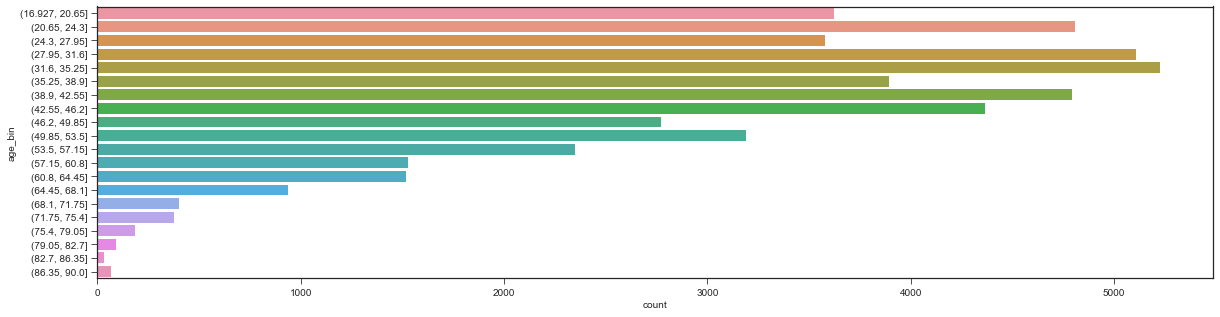

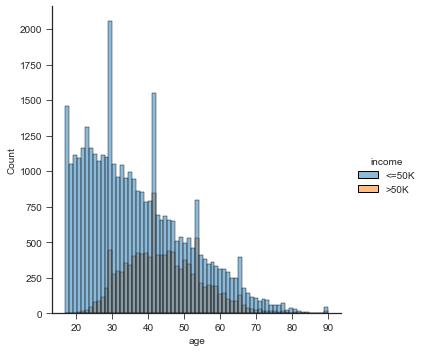

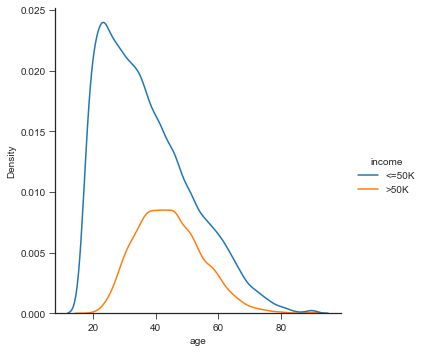

In [26]:
# New displot
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 

sns.countplot(y="age_bin", data=my_df)
sns.displot(x=my_df['age'] ,data=my_df, hue='income')
sns.displot(x=my_df['age'] ,data=my_df, hue='income',kind="kde")


In [27]:
my_df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


### Race

<Figure size 1440x360 with 0 Axes>

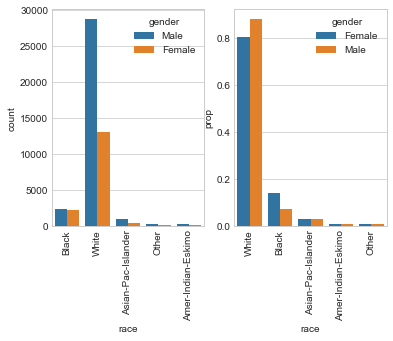

In [28]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
chart=sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
plt.xticks(rotation=90)
plt.show()

### Hours of Work 

In [29]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['hours-per-week_bin'] = pd.cut(my_df['hours-per-week'], 10)
my_df['hours-per-week'] = my_df['hours-per-week']


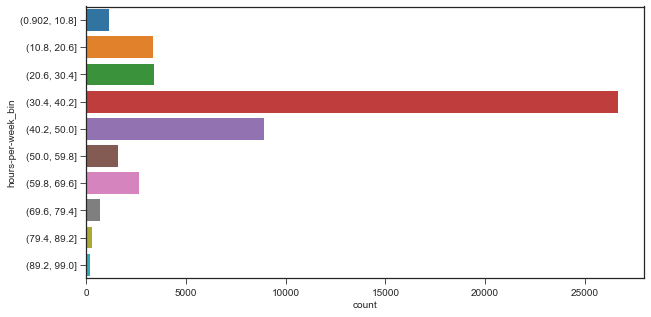

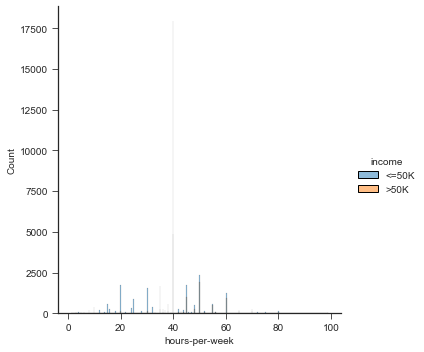

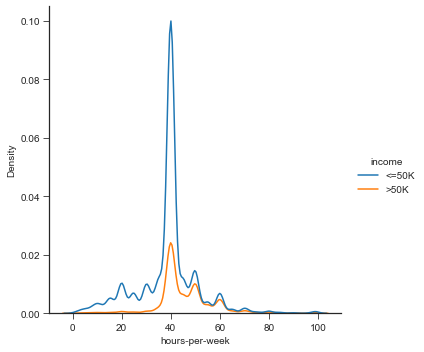

In [30]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets

plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(10,5)) 
sns.countplot(y="hours-per-week_bin", data=my_df)
sns.displot( x=my_df['hours-per-week'] ,data=my_df,hue="income",legend=True)
sns.displot( x=my_df['hours-per-week'] ,data=my_df,  kind="kde",hue='income',legend=True)


### Create a crossing feature: Age + hour of work

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

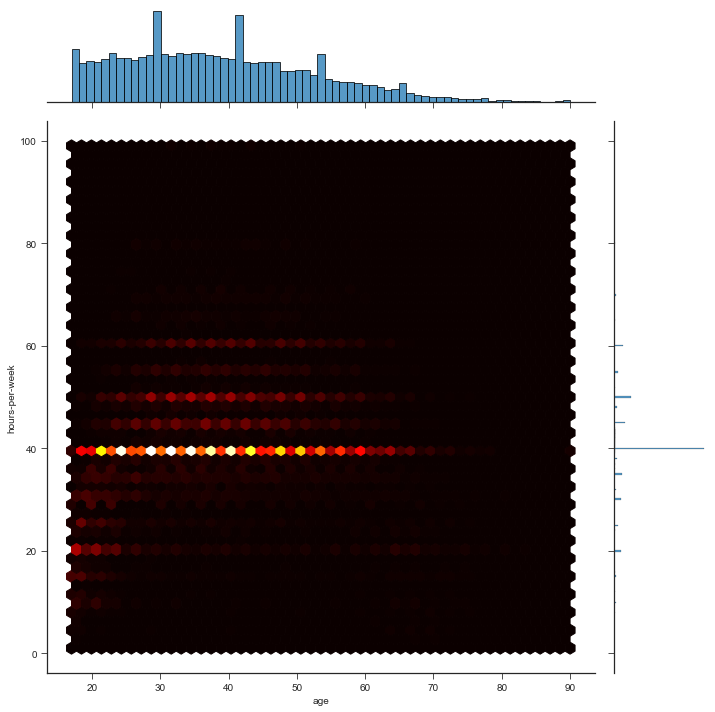

In [31]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = my_df, 
              kind = 'hex', 
              cmap= 'hot', 
              height=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
#sns.regplot(my_df.age, my_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')
sns.regplot(data=my_df, x=my_df['age'], y=my_df['hours-per-week'], scatter=False, color='grey')

In [32]:
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,age_bin,hours-per-week_bin
0,25.0,Private,226802,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K,7,"(24.3, 27.95]","(30.4, 40.2]"
1,38.0,Private,89814,HighGrad,Married,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K,9,"(35.25, 38.9]","(40.2, 50.0]"
2,28.0,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K,12,"(27.95, 31.6]","(30.4, 40.2]"
3,44.0,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K,10,"(42.55, 46.2]","(30.4, 40.2]"
4,18.0,?,103497,CommunityCollege,NotMarried,?,Own-child,White,Female,0,0,30.0,United-States,<=50K,10,"(16.927, 20.65]","(20.6, 30.4]"


In [33]:
# Crossing Numerical Features
my_df['age-hours'] = my_df['age']*my_df['hours-per-week']
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)

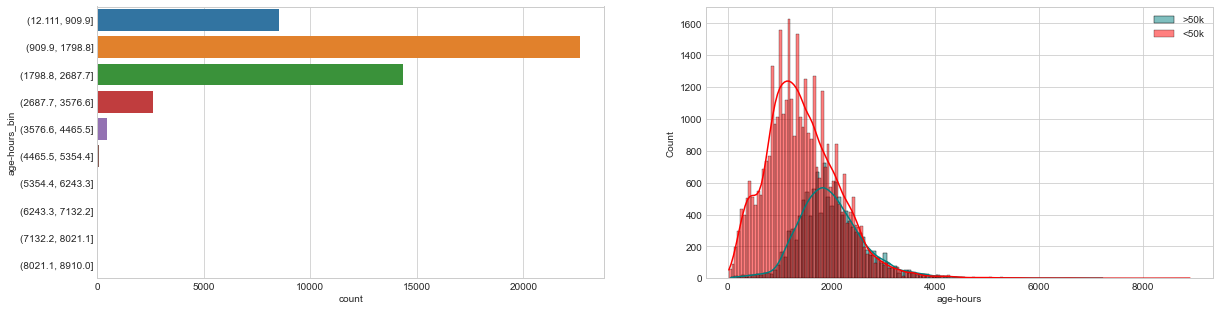

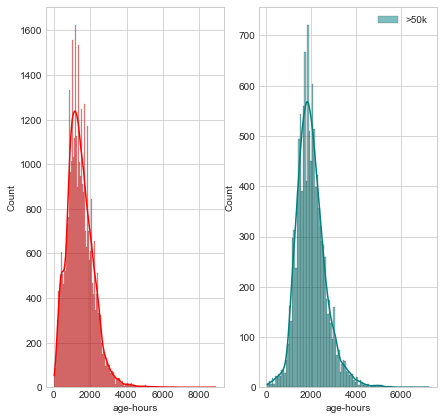

In [34]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=my_df);
plt.subplot(1, 2, 2)

'''
sns.distplot(my_df[my_df['income'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['income'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})
'''
sns.histplot(data=my_df, x=my_df[my_df['income'] == '>50K']['age-hours'], color="teal", label=">50k", kde=True)
sns.histplot(data=my_df, x=my_df[my_df['income'] == '<=50K']['age-hours'], color="red", label="<50k", kde=True)
plt.legend() 
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7, 7))
sns.histplot(data=my_df, x=my_df[my_df['income'] == '<=50K']['age-hours'], color="red", label="<50k", kde=True,ax=ax1)
sns.histplot(data=my_df, x=my_df[my_df['income'] == '>50K']['age-hours'], color="teal", label=">50k", kde=True,ax=ax2)
plt.legend()
plt.show()
#sns.displot(x=my_df['hours-per-week'] ,data=my_df, hue='income',kind="kde")


## EDA

### Pair Plot

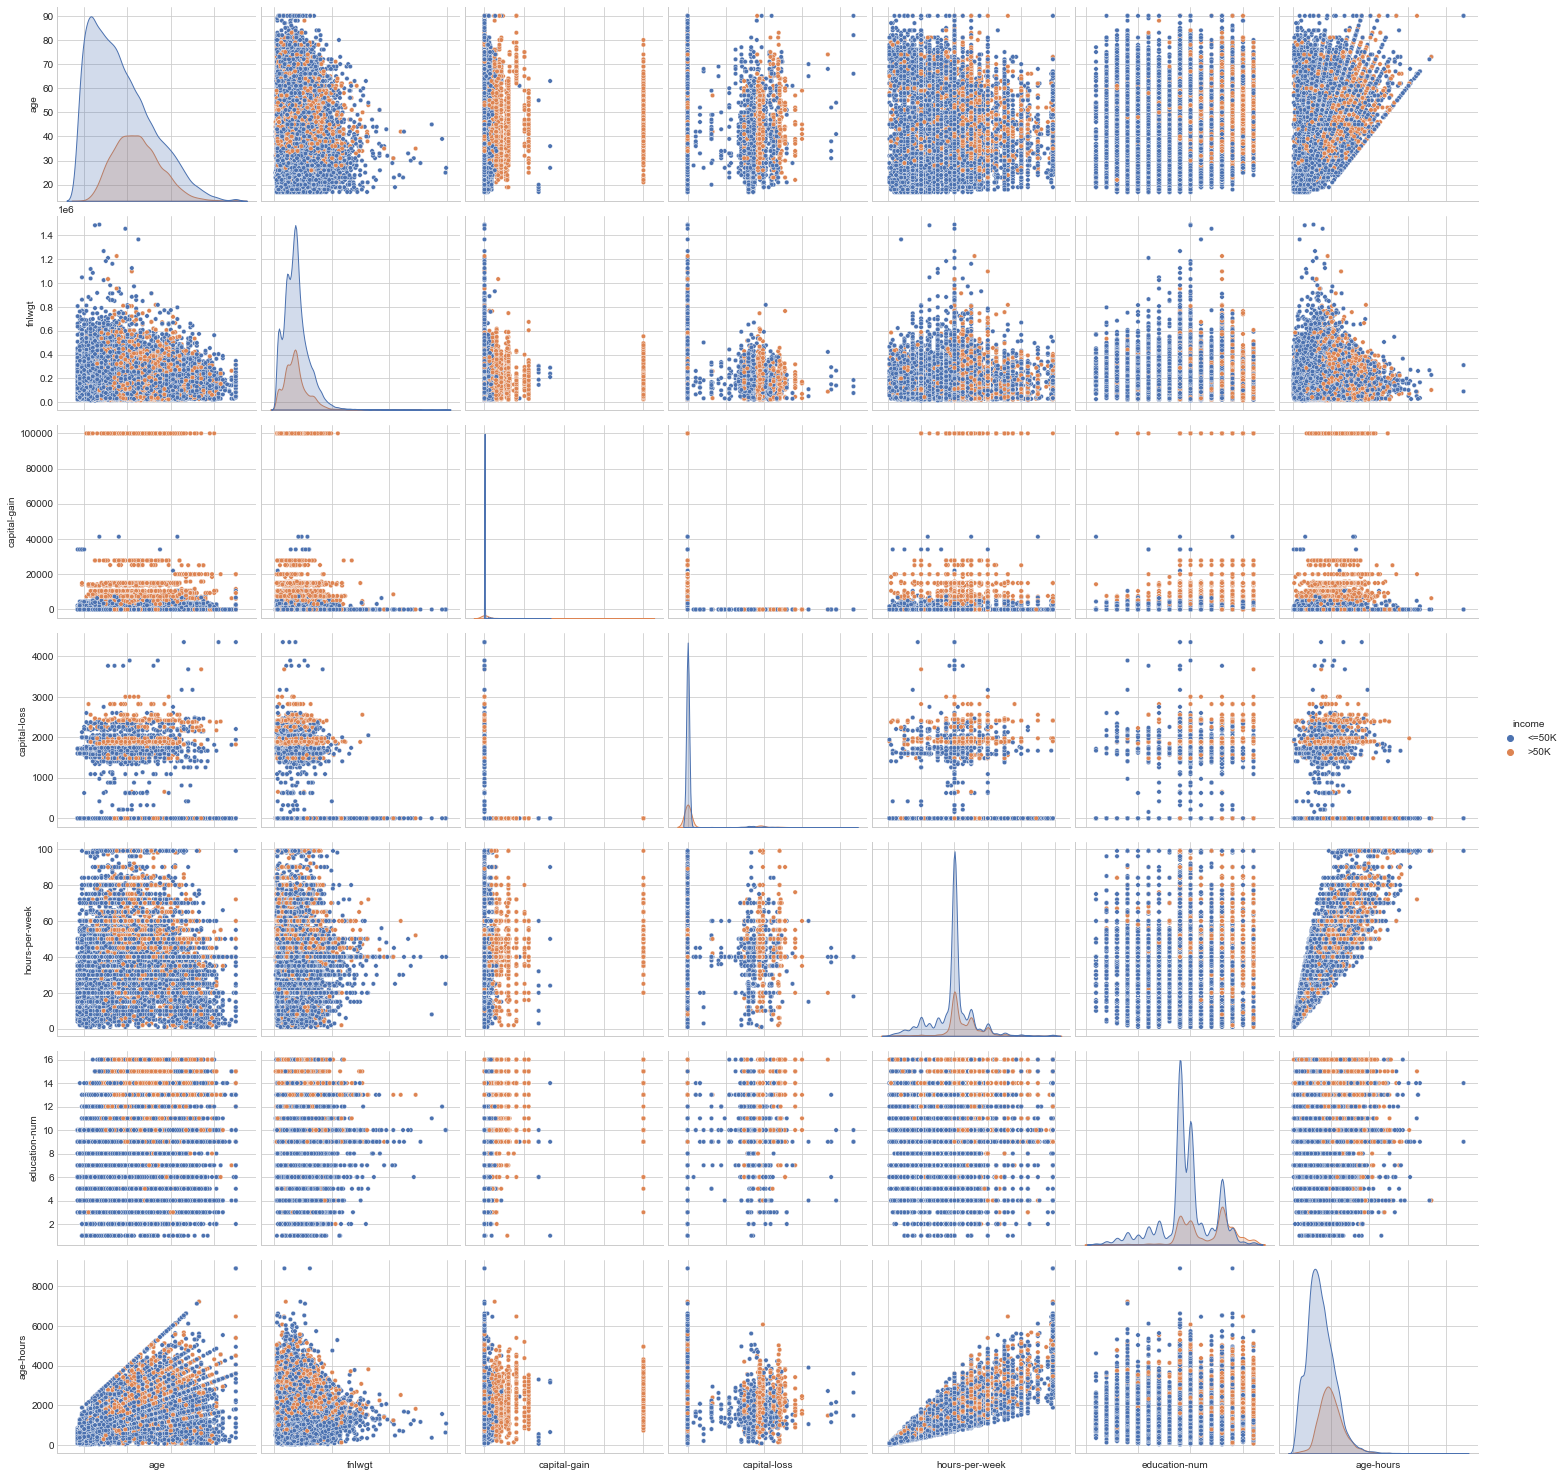

In [35]:
#pair plots of entire dataset
pp = sns.pairplot(my_df, hue = 'income', palette = 'deep', 
                  height=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### Correlation Heatmap

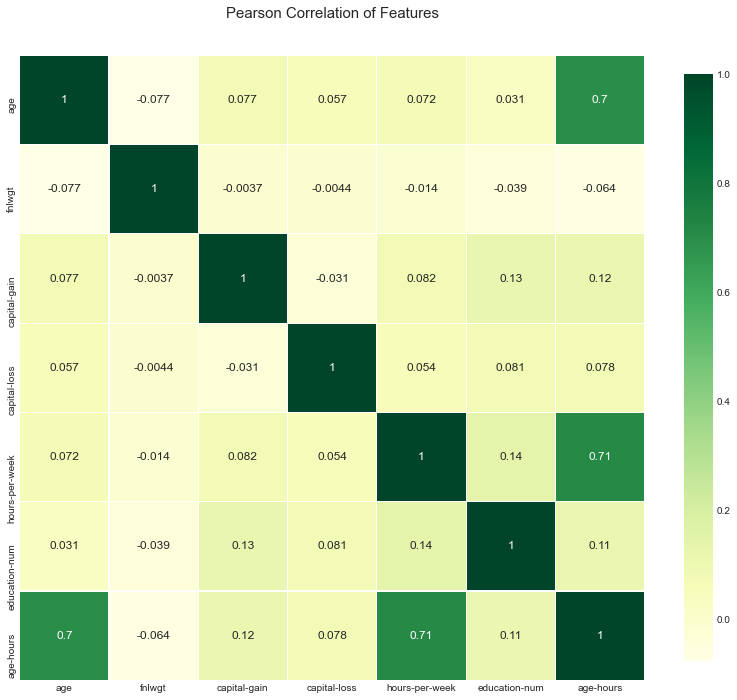

In [36]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)

### Bivariate Analysis

In [37]:
my_df.tail()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,age_bin,hours-per-week_bin,age-hours,age-hours_bin
48837,27.0,Private,257302,CommunityCollege,Married,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,12,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]"
48838,40.0,Private,154374,HighGrad,Married,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K,9,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]"
48839,58.0,Private,151910,HighGrad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,9,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]"
48840,22.0,Private,201490,HighGrad,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K,9,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]"
48841,52.0,Self-emp-inc,287927,HighGrad,Married,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K,9,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]"


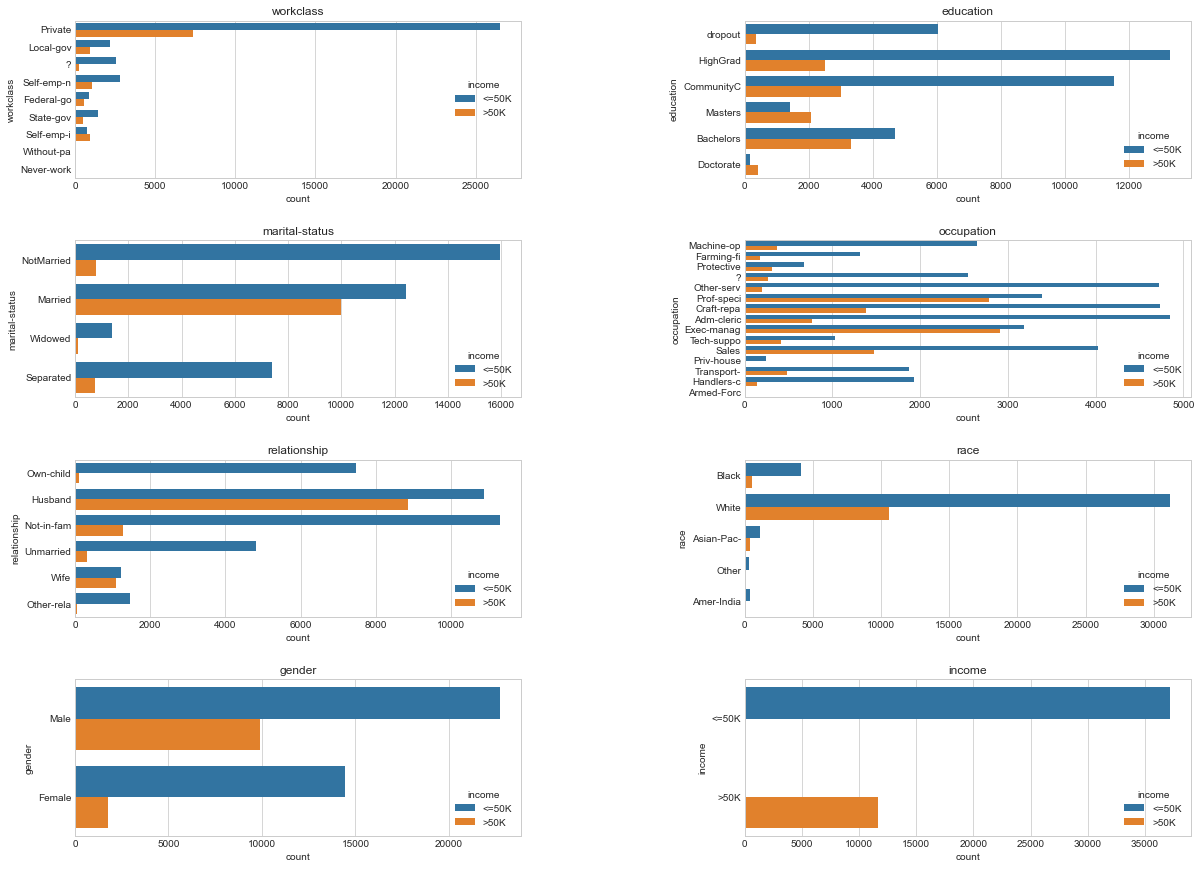

In [38]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','income']]  

plot_bivariate_bar(bivariate_df, hue='income', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)


* The dataset was created in very old days so, a large number of jobs fall into the category of mannual labor, e.g., Handlers cleaners, craft repairers, etc. Executive managerial role and some one with a professional speciality has a high level payment.

### Occupation vs. Income Level

<AxesSubplot:xlabel='occupation', ylabel='age'>

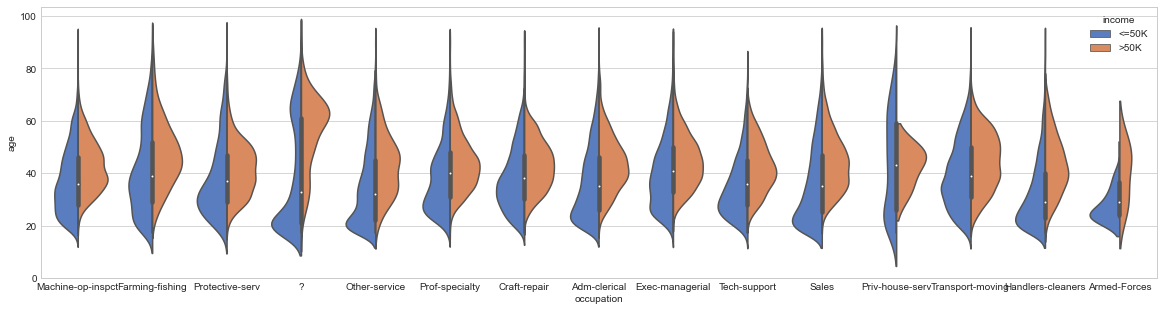

In [39]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="income",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

The general trend is in sync with common sense: more senior workers have higher salaries. Armed-forces don't have a high job salaries.

Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs. 

### Race vs. Income Level

![censusrace](https://user-images.githubusercontent.com/31974451/36568899-8e25bc6c-17e0-11e8-9e85-53d0f5cc1d7f.png)


<AxesSubplot:xlabel='race', ylabel='age'>

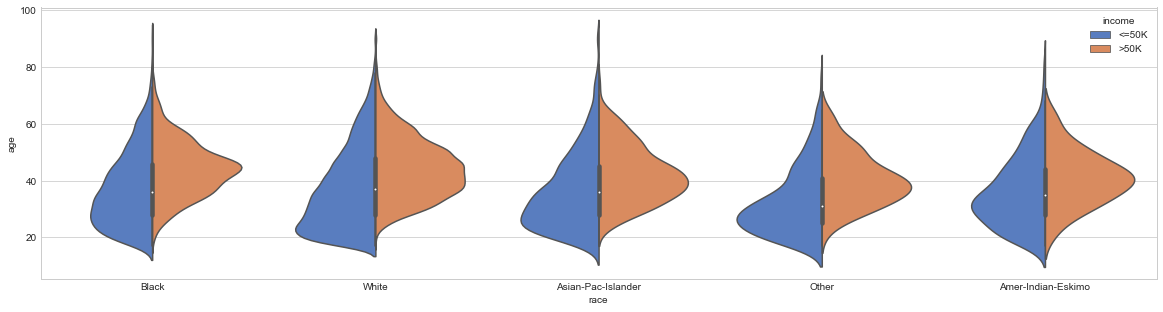

In [40]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

## Building Machine Learning Models

In [41]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

### Feature Encoding 

In [42]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split


In [43]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,8,4,19329,5,1,7,3,2,1,0,0,39,39,0,6,2,3,478,1
1,21,4,4212,3,0,5,0,4,1,0,0,49,39,0,8,5,4,818,2
2,11,2,25340,1,0,11,0,4,1,0,0,39,39,1,11,3,3,530,1
3,27,4,11201,1,0,7,0,2,1,98,0,39,39,1,9,7,3,766,1
4,1,0,5411,1,1,0,3,4,0,0,0,29,39,0,9,0,2,285,0


In [44]:
drop_elements = ['education', 'native-country', 'income', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = my_df["income"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,education-num,age-hours
0,8,4,19329,1,7,3,2,1,0,0,39,6,478
1,21,4,4212,0,5,0,4,1,0,0,49,8,818
2,11,2,25340,0,11,0,4,1,0,0,39,11,530
3,27,4,11201,0,7,0,2,1,98,0,39,9,766
4,1,0,5411,1,0,3,4,0,0,0,29,9,285


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Component Analysis

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


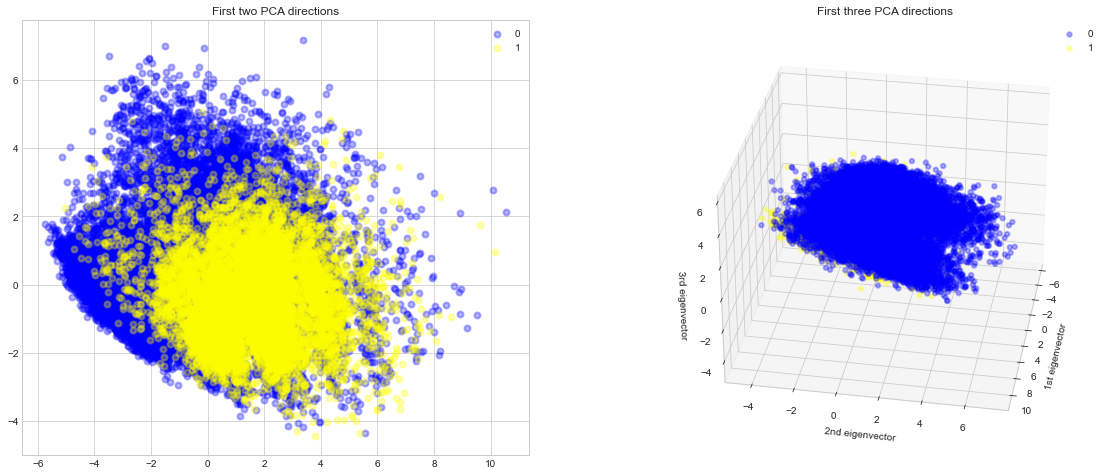

In [47]:
# Components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(my_df.drop('income', axis=1))
X = std_scale.transform(my_df.drop('income', axis=1))
y = my_df['income']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)